# For those new to Jupyter notebooks

-  This is a jupyter notebook file
- It is a format used by many data science fields for data analysis and visualization tasks
- Useful because (a) it is easier to work with and understand than single python script files (.py) and (b) enables you to break problems down into steps, and quickly see those results in the same window

## Types of Jupyter notebook cells 
(1) **Markdown** cells (Cell->Cell Type->Markdown)
   - text, images 
   - cannot compile code you put in Markdown cells 
<br><br>

(2) **Code** cells (Cell->Cell Type->Code)
   - store and compile your code
   - any non-code text must be formatted as a comment - begin with "#"
<br><br>

### Running Jupyter notebook cells 
(1) **Entire notebook**
 - Cell->Run All
<br><br>

(2) **Single code cell**
 - Click on the cell and hit Shift-Enter 

# How to quickly read and get summary of  typical types of data files:
- xlsx (Excel)
- .txt (Text) 
- .csv (Comma separated)
- ....can even a read website url with a table on the page

### Use cases
-   Large file size / number of records makes it difficult and slow to use the data directly
-   Get a quick, succinct understanding of the data layout, record count, column names, missing data
-   You will be doing repetitive checks, counts, analyses, etc., across different columns, datasets 

In [1]:
# Import the Python "modules" that we need.
# Many modules are standard, such that "import" is sufficient.
# Others require first installing the package!
# We will use the Python "matplotlib" plotting module here.

import os
import csv

import chardet # automatically decodes the file format to handle character formatting differences in some file types
import numpy as np # used to do computations and manipulations of data
import pandas as pd # use to to work on data as dataframe
from datetime import datetime
from matplotlib import pyplot as plt # if you want to make plots
import itables
from openpyxl import load_workbook

In [2]:
os.getcwd() # tells us the current working directory that we are using to pull files

'c:\\Users\\beste\\OneDrive - Qral Group\\Desktop\\python\\Playground\\python_examples\\python-examples'

In [3]:
## define an output path, if we want to save things later
working_directory=os.getcwd()
output_path= os.path.join(working_directory,'Output') # will automatically know that the folder called 'Output' should be added to the working directory path
# Create the directory if it does not exist
os.makedirs(output_path, exist_ok=True)

In [4]:
print(output_path)

c:\Users\beste\OneDrive - Qral Group\Desktop\python\Playground\python_examples\python-examples\Output


## Read in Excel file

In [5]:
# Name the path where your data is located

excel_file = r"..\reading_different_file_types\Retail - Stores (Retail Stores Only).xlsx"

# Load the Excel file
xls = pd.ExcelFile(excel_file)

# Get the sheet names
sheet_names = xls.sheet_names

# Print the sheet names
print(sheet_names)


# specify the excel sheet name, if needed
# sheet_name= "sheet_names"
# Load the data from the  file into a DataFrame
excel_data = pd.read_excel(excel_file, sheet_name= sheet_names[0] ,header=0)

['Retail - Stores']


In [6]:
itables.show(excel_data)

In [7]:
excel_data["Address"].isna().sum() #blank addresses 

618

In [8]:
(excel_data["Address"]=="UNASSIGNED").sum() # addresses are called UNASSIGNED, i.e., no address data

51

In [9]:
print(excel_data.groupby("Vendor").size().sum()) # groupby vendor, count number of rows in each, then sum up all the rows in the vendor column

print("\n") # just means print a  blank space on a new line so that the previous output is more distinct from the next one

print(excel_data.groupby("Vendor").size()) # group by vendor then count number of rows in each

25523


Vendor
Amazon          1
CVS          7514
Rite Aid     2163
Target       2012
Walgreens    9167
Walmart      4666
dtype: int64


In [10]:
vendor_groups = excel_data.groupby("Vendor")
# Thee .groups attribute of a DataFrameGroupBy object returns a dictionary 
# the keys are the group names and the values are the index labels of the rows in each group.
vendor_list = list(vendor_groups.groups.keys())
vendor_list

# Define the output file name with extension
output_Excel_file = os.path.join(output_path, 'output_Excel_file.xlsx')

# # group by vendor save each group to a separate sheet in a single excel file.
with pd.ExcelWriter(output_Excel_file) as writer:
    for name, group in vendor_groups:
        group.to_excel(writer, sheet_name=name, index=False)

## Reading in .csv file
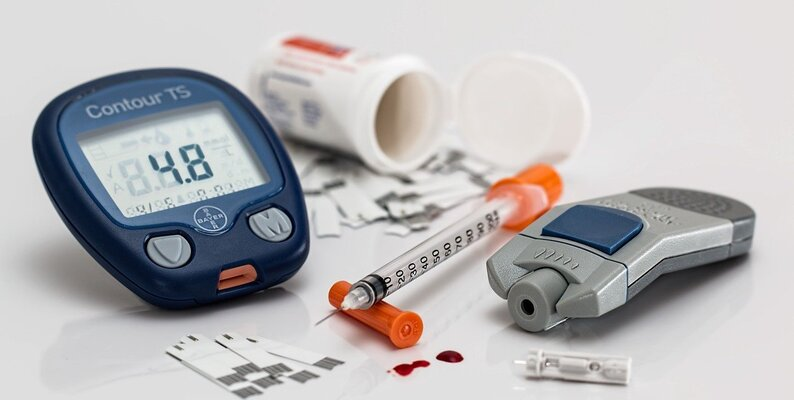
### Diabetest Health Indicators Dataset
- Dataset from a health-related telephone survey started in 1984 regarding the Diabetes status and Health of Americans
- Is collected annually by the CDC, and is often used to make machine learning models for prediction of Type 2 Diabetes

In [11]:
# Read the data into Pandas
csv_data = pd.read_csv(r'..\reading_different_file_types\diabetes_012_health_indicators_BRFSS2015.csv')

# Set display options
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
#pd.set_option('display.precision', 2)


csv_data

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [12]:
csv_data.isna().sum() #blank rows with no data

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [13]:
csv_data.isna().sum() #blank rows with no data

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [14]:
print((csv_data["Diabetes_012"]==2).sum()) # Diabetes patients are defined with value of 2

# Save the Diabetes_012 data as a single column called a Series where the unique values are counted for each group.
# In this case, we want to kno how many row are 0, 1, or 2? i.e., how many patients are not diabetic, pre-diabetic and diabetic 
diabetes_counts = csv_data["Diabetes_012"].value_counts()
diabetes_counts

35346


Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

<Axes: ylabel='count'>

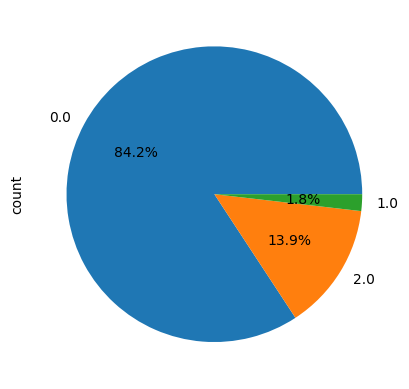

In [15]:
# make a pie chart using your value counts

diabetes_counts.plot.pie(autopct='%1.1f%%') # autopct='%1.0f%%' argument, to display the percentages in the pie chart  with 1 decimal place

## Reading in .csv with metadata at the start 
###  Carbon Dioxide data: Manua Loa Obvervatory, Hawaii
    - popular dataset from climate science often used to support global warming 
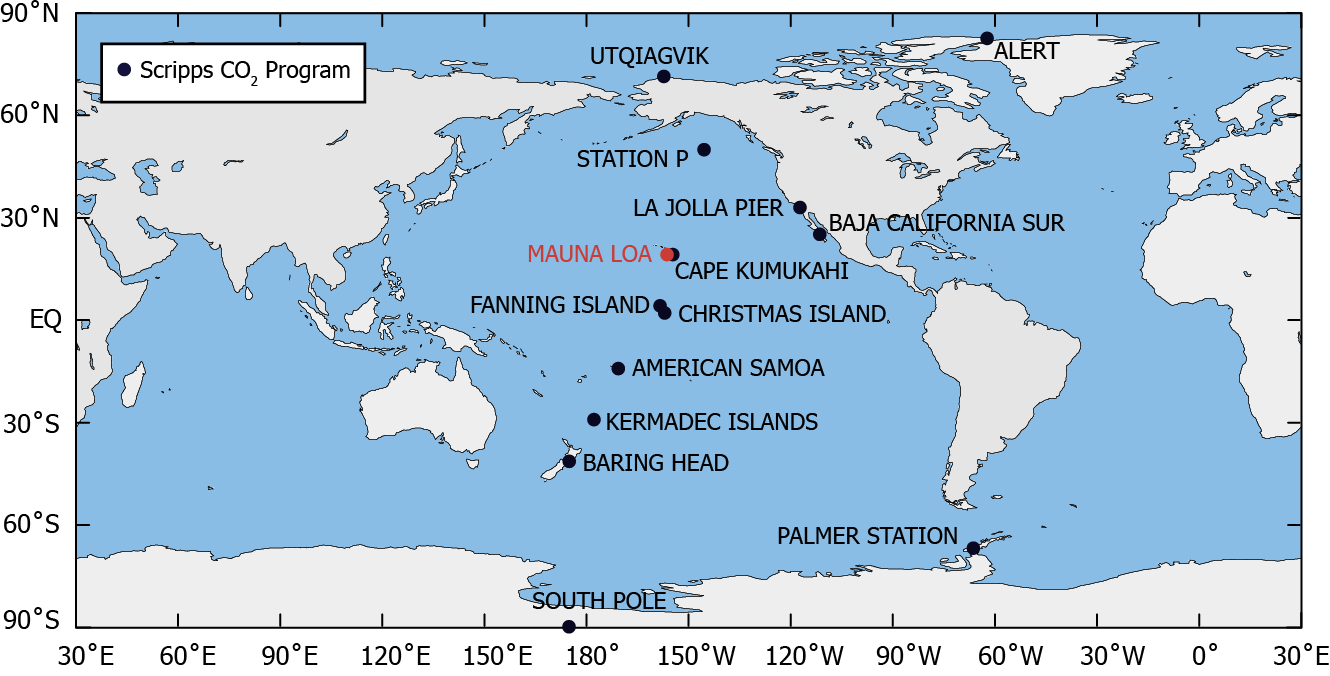

In [16]:
# It helps to read in line-by-line using readlines before you specify
# your arugments for pd.read_csv!
# Why are we doing it this way?
# This file is pretty small so we could just open it in notepad or whatnot
# But what if...it wasn't?  Or we had many files just like this?
# So this is an automated way to help us decide how many rows we will have to skip!
i=0
for line in (open(r'..\reading_different_file_types\daily_in_situ_co2_mlo.csv').readlines()):
    i = i+1
    print(i,line)

1 % Daily baseline values on the 12 scale

2 % Created 05-Apr-2024 13:23:11

3 %

4 % Yr    - Year

5 % Mn    - Month

6 % Dy    - Day

7 % CO2   - CO2 baseline value

8 % NB    - Number of hourly averages in the baseline

9 % scale - Calibration scale code

10 % sta   - Sampling station. Occasional samples have been recorded at the Maunakea Observatory (mko)

11 %

12 % Yr, Mn, Dy,    CO2, NB, scale, sta

13 1958, 01, 01,    NaN,  0, 12.0, mlo

14 1958, 01, 02,    NaN,  0, 12.0, mlo

15 1958, 01, 03,    NaN,  0, 12.0, mlo

16 1958, 01, 04,    NaN,  0, 12.0, mlo

17 1958, 01, 05,    NaN,  0, 12.0, mlo

18 1958, 01, 06,    NaN,  0, 12.0, mlo

19 1958, 01, 07,    NaN,  0, 12.0, mlo

20 1958, 01, 08,    NaN,  0, 12.0, mlo

21 1958, 01, 09,    NaN,  0, 12.0, mlo

22 1958, 01, 10,    NaN,  0, 12.0, mlo

23 1958, 01, 11,    NaN,  0, 12.0, mlo

24 1958, 01, 12,    NaN,  0, 12.0, mlo

25 1958, 01, 13,    NaN,  0, 12.0, mlo

26 1958, 01, 14,    NaN,  0, 12.0, mlo

27 1958, 01, 15,    NaN,  0, 1

In [17]:
# COPY the data at the top so we can know the column names and decide what to do.....

# Copied .txt file data:
# 1 % Daily baseline values on the 12 scale

# 2 % Created 05-Apr-2024 13:23:11

# 3 %

# 4 % Yr    - Year

# 5 % Mn    - Month

# 6 % Dy    - Day

# 7 % CO2   - CO2 baseline value

# 8 % NB    - Number of hourly averages in the baseline

# 9 % scale - Calibration scale code

# 10 % sta   - Sampling station. Occasional samples have been recorded at the Maunakea Observatory (mko)

# 11 %

# 12 % Yr, Mn, Dy,    CO2, NB, scale, sta

# You'll want to skip rows INCLUDING the original column headings in the raw file as we are going to reset those
# Via the names=["Year", "Month", "Day", "Decimal Date", "CO2"] argument that you'll pass to read_csv
# You'll also want to pass a special argument to read_csv so Pandas understands how to separate the columns, yes?
csv_data = pd.read_csv(r'..\reading_different_file_types\daily_in_situ_co2_mlo.csv',skiprows=23,delimiter=',', names=["Year", "Month", "Day", "CO2", "Number of hourly averages", "Calibration scale code","Sampling station"])

In [18]:
csv_data

,Year,Month,Day,CO2,Number of hourly averages,Calibration scale code,Sampling station
0,1958,1,12,NaN,0,12.0,mlo
1,1958,1,13,NaN,0,12.0,mlo
2,1958,1,14,NaN,0,12.0,mlo
3,1958,1,15,NaN,0,12.0,mlo
4,1958,1,16,NaN,0,12.0,mlo
...,...,...,...,...,...,...,...
24211,2024,4,26,NaN,0,12.0,mlo
24212,2024,4,27,NaN,0,12.0,mlo
24213,2024,4,28,NaN,0,12.0,mlo
24214,2024,4,29,NaN,0,12.0,mlo


## Reading a table from a website

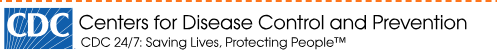
- An Annual Infectious disease report from CDC

<bk>

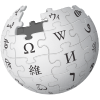
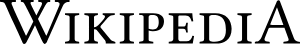

- Population data from Wikipedia 



In [30]:
# using pandas read_html() method

dfs = pd.read_html('https://wonder.cdc.gov/nndss/static/2020/annual/2020-table3.html')
dfs[0]

,Disease,Jan.,Feb.,Mar.,Apr.,May,June,July,Aug.,Sept.,Oct.,Nov.,Dec.,Unknown,Total
0,Anthrax,—,—,—,—,—,—,—,—,—,—,—,1,—,1
1,Arboviral diseases,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chikungunya virus disease,10,8,1,2,3,—,1,—,3,2,2,5,—,37
3,Eastern equine encephalitis virus disease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Neuroinvasive,—,—,—,—,—,—,2,5,5,1,—,—,—,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Zika virus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,"Zika virus disease, congenital †††††",—,—,—,—,—,—,—,—,—,—,—,—,—,—
171,"Zika virus disease, non-congenital",—,—,1,1,1,—,—,—,—,1,—,—,—,4
172,"Zika virus infection, congenital †††††",—,—,—,—,—,—,—,—,—,—,—,—,—,—


In [31]:
# another example

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)'
tables = pd.read_html(url)
tables[0]

,Location,Population (1 July 2022),Population (1 July 2023),Change,UN Continental Region[1],UN Statistical Subregion[1]
0,World,7975105156,8045311448,+0.88%,NaN,NaN
1,India,1417173173,1428627663,+0.81%,Asia,Southern Asia
2,China[a],1425887337,1425671352,−0.02%,Asia,Eastern Asia
3,United States,338289857,339996564,+0.50%,Americas,Northern America
4,Indonesia,275501339,277534123,+0.74%,Asia,South-eastern Asia
...,...,...,...,...,...,...
234,Falkland Islands (United Kingdom),3780,3791,+0.29%,Americas,South America
235,Niue,1934,1935,+0.05%,Oceania,Polynesia
236,Tokelau (New Zealand),1871,1893,+1.18%,Oceania,Polynesia
237,Vatican City[x],510,518,NaN,Europe,Southern Europe


In [21]:

html_table_data= tables[0]

itables.show(html_table_data)

In [24]:
# another example

url = 'https://www.espn.com/nba/stats'
tables = pd.read_html(url)
tables[0]
# have a look at the actual web page and notice that we are missing the players names
# Notice we are missing data
# often means that the data is either not in a simple HTML table format or it's dynamically loaded via JavaScript 

,Points,PTS
0,1PHI,37.7
1,2IND,36.5
2,3MIL,34.5
3,4DAL,32.5
4,5LAL,32.3
5,Complete Leaders,Complete Leaders


# Reading data from a webpage that has dynamic content 
- **Why?** pands read_html(url of the webset) does not work on things that are not tables
- We need  a new library and methods to extract data from websites that change their content dynamically (over time, and/or by user location)

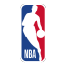
- NBA stats website 

In [32]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time


# Setting up the Chrome WebDriver
options = Options()
# options.add_argument("--headless") # This option is often recommended for headless setups, meaning you use it if you do not want to see the browser open
# options.add_argument("--disable-gpu")  # This option is often recommended for headless setups, meaning you use it if you do not want to see the browser open
options.headless = True  # Run in headless mode
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# URL of the page
url = 'https://www.espn.com/nba/stats'

# Open the page
driver.get(url)
time.sleep(5)  # Wait for the page to load completely

# Get the page source and read it with pandas
html = driver.page_source
dfs = pd.read_html(html)

# Close the driver
driver.quit()

# Assuming the desired data is in the first table
player_stats = dfs[0]
player_stats

,Points,PTS
0,1Joel EmbiidPHI,37.7
1,2Pascal SiakamIND,36.5
2,3Damian LillardMIL,34.5
3,4Luka DoncicDAL,32.5
4,5Anthony DavisLAL,32.3
5,Complete Leaders,Complete Leaders
